### Initialization and Loading data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("data/clean_data.csv").drop(labels=["Unnamed: 0", "city"], axis=1)
data_features = data.drop(
    labels=["university_with_year", "rank_display_raw", "score", "class"],
    axis=1
)

all_classes = [0,1,2,3,4,5,6,7,8,10,12]
data_best_universities = data.loc[data['class'].isin(all_classes[:5])]
data_worst_universities = data.loc[data['class'].isin(all_classes[11-5:])]

### General informations



In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6001 entries, 0 to 6000
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university_with_year    6001 non-null   object 
 1   rank_display_raw        6001 non-null   float64
 2   score                   2633 non-null   float64
 3   country                 6001 non-null   object 
 4   region                  6001 non-null   object 
 5   type                    5997 non-null   object 
 6   research_output         6001 non-null   object 
 7   student_faculty_ratio   6001 non-null   float64
 8   international_students  6001 non-null   float64
 9   size                    6001 non-null   object 
 10  faculty_count           6001 non-null   float64
 11  class                   6001 non-null   float64
dtypes: float64(6), object(6)
memory usage: 562.7+ KB


#### Classes distribution

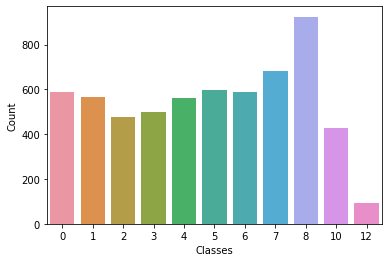

In [3]:
ax = sns.countplot(x="class", data=data)
ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "10", "12"])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

### Correlation

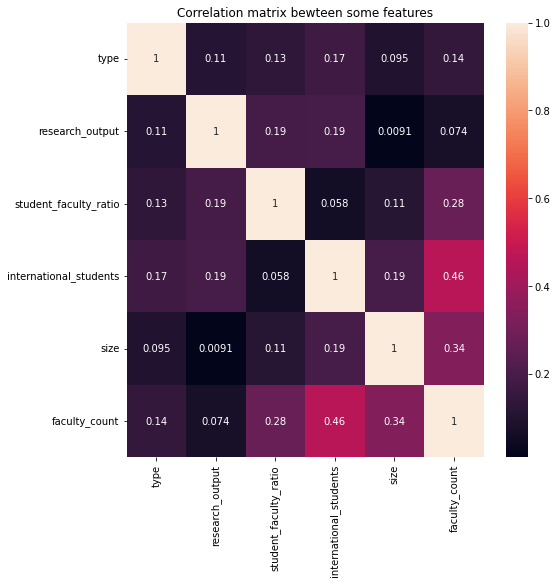

In [4]:
from pandas.api.types import is_object_dtype

data_features_corr = data_features.drop(labels=["country", "region"], axis=1)

for col in data_features_corr.columns:
    if is_object_dtype(data_features_corr[col]):
        data_features_corr[col] = data_features_corr[col].str.lower()
        data_features_corr[col] = data_features_corr[col].astype('category')
        data_features_corr[col] = data_features_corr[col].cat.codes + 1

corr_mtx = data_features_corr.corr()

plt.figure(figsize = (8,8))
sns.heatmap(abs(corr_mtx), annot = True)
plt.title("Correlation matrix bewteen some features")
plt.show()

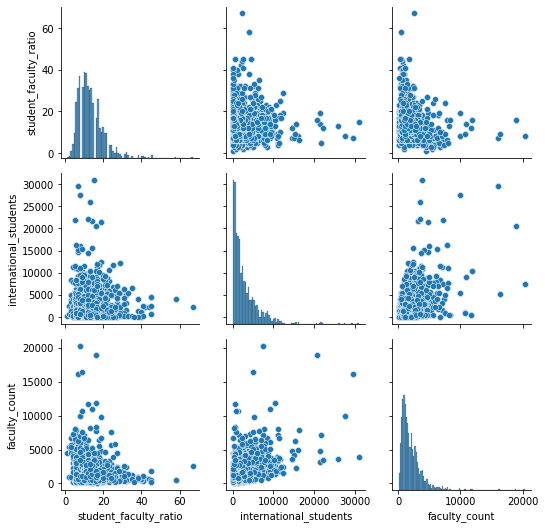

In [5]:
correlated_features = [
    "student_faculty_ratio",
    "international_students",
    "faculty_count"
]

g = sns.PairGrid(data_features[correlated_features])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [6]:
data.dtypes

university_with_year       object
rank_display_raw          float64
score                     float64
country                    object
region                     object
type                       object
research_output            object
student_faculty_ratio     float64
international_students    float64
size                       object
faculty_count             float64
class                     float64
dtype: object

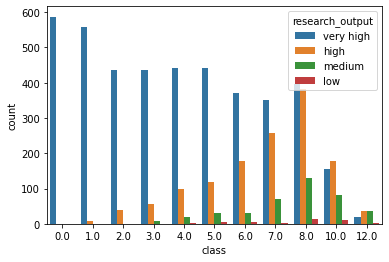

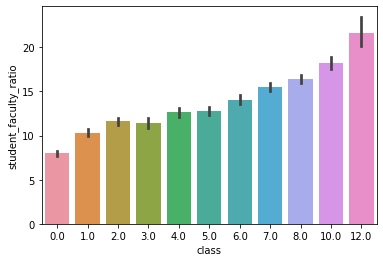

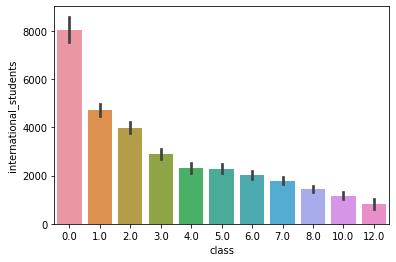

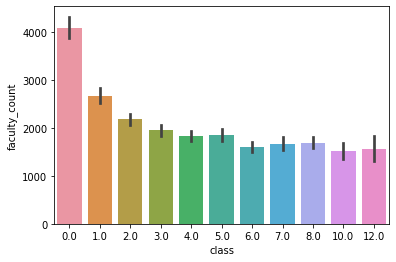

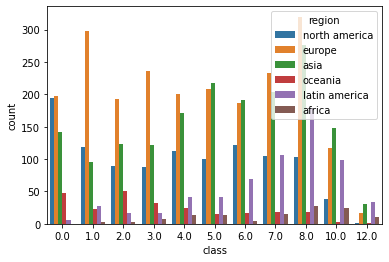

In [7]:
"""
student_faculty_ratio 
research_output
international_students
size
faculty_count
"""
# plt.figure(figsize=(10, 5))


# fig, axs = plt.subplots(2, 2)
# fig.set_figheight(10)
# fig.set_figwidth(13)

sns.countplot(
    hue="research_output",
    x="class",
    data=data,
    # ax=axs[0][0]
)
plt.show()
sns.barplot(
    x="class",
    y="student_faculty_ratio",
    data=data,
    # ax=axs[0][1]
)

plt.show()
sns.barplot(
    x="class",
    y="international_students",
    data=data,
    # ax=axs[1][0]
)
plt.show()
sns.barplot(
    y="faculty_count",
    x="class",
    data=data,
    # ax=axs[1][1]
)
plt.show()

sns.countplot(
    hue="region",
    x="class",
    data=data,
    # ax=axs[1][1]
)
plt.show()
